Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
df

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


Text(0, 0.5, 'Sales')

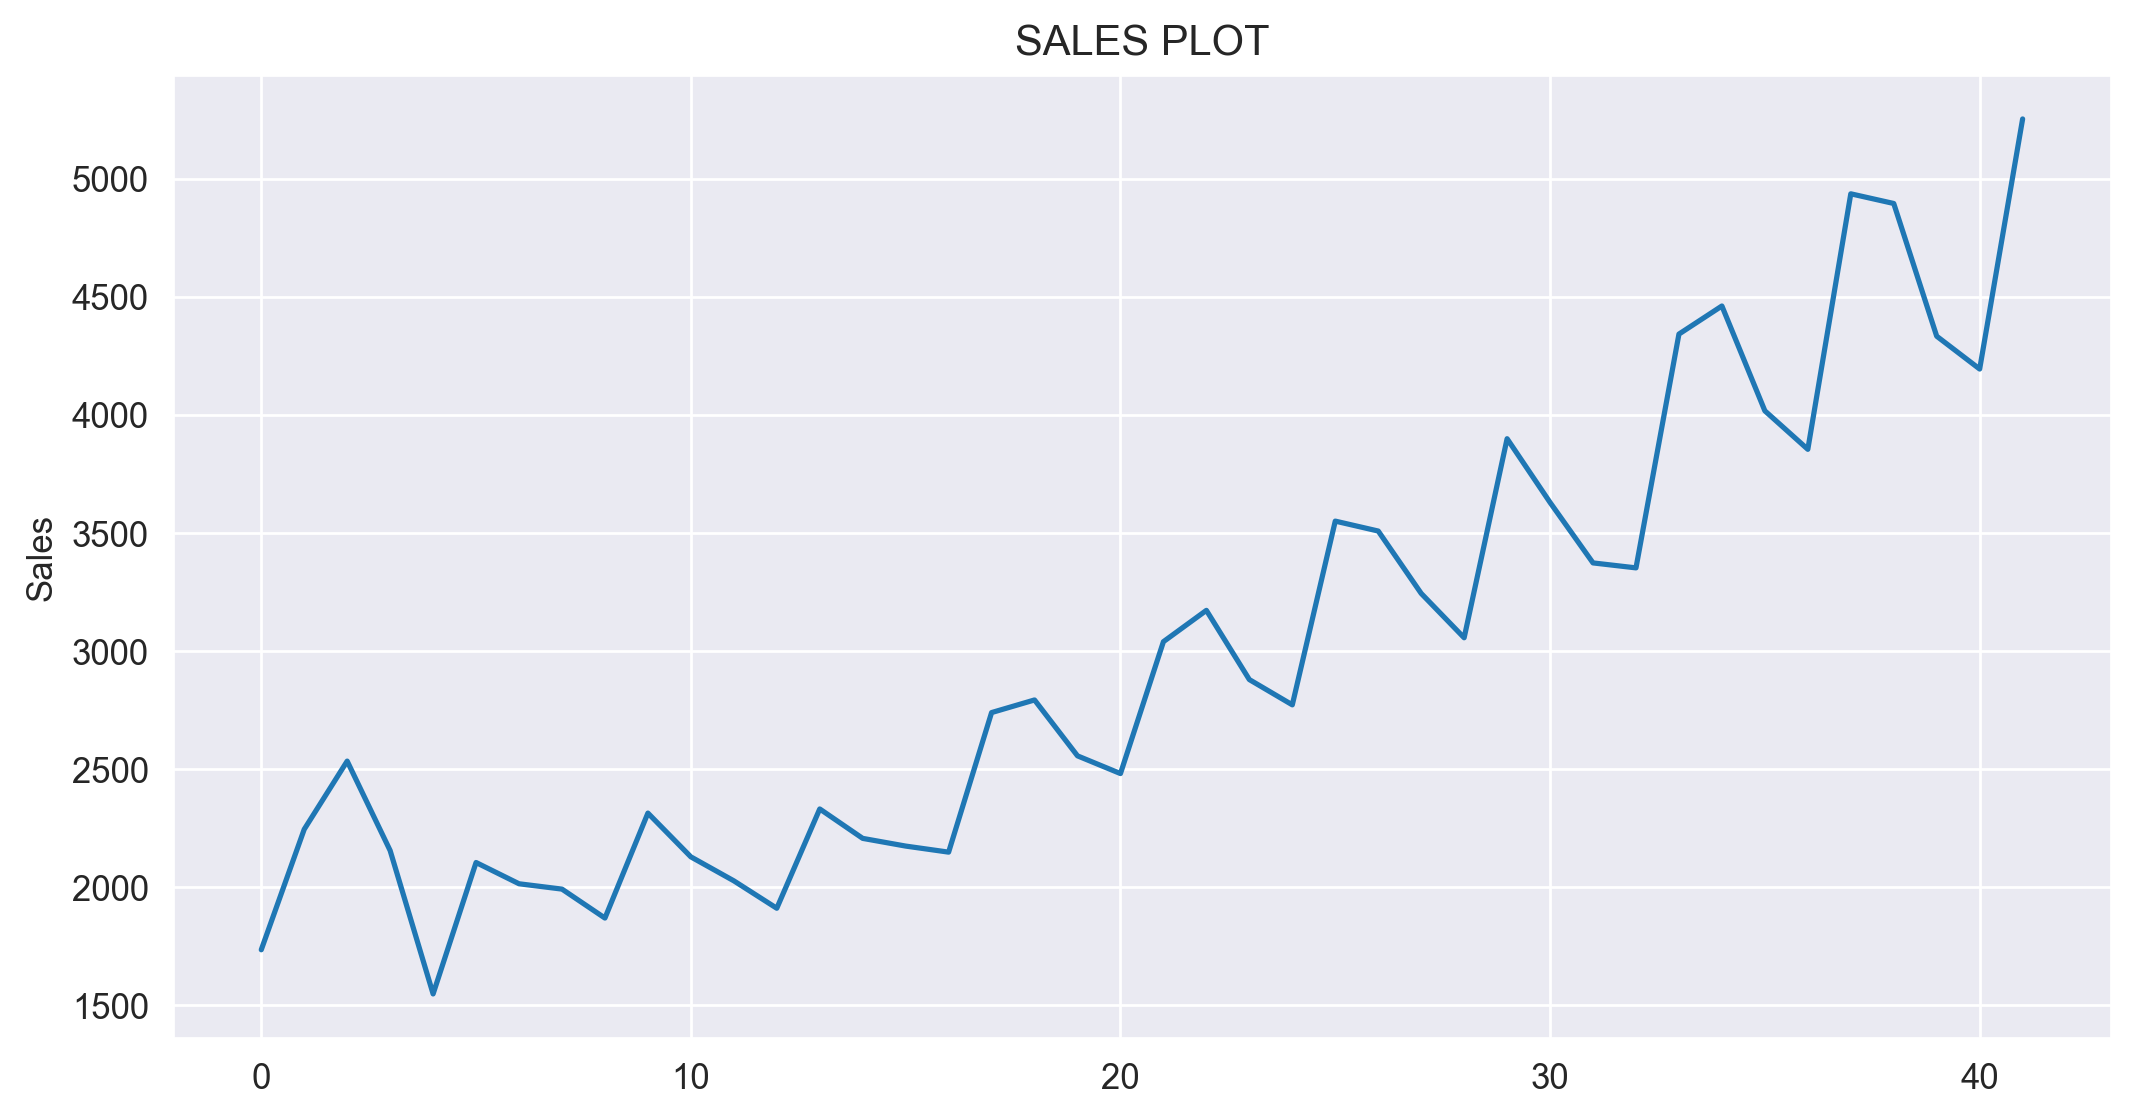

In [4]:
plt.plot(df['Sales'])
plt.title('SALES PLOT')
plt.ylabel('Sales')

In [5]:
quarters = ['Q1','Q2','Q3','Q4']
n = df['Quarter'][0]
n[0:2]

'Q1'

In [6]:
df['Quater'] = 0
for i in range(42):
    n = df['Quarter'][i]
    df['Quarter'][i] = n[0:2]

In [7]:
df

,Quarter,Sales,Quater
0,Q1,1734.827000,0
1,Q2,2244.960999,0
2,Q3,2533.804993,0
3,Q4,2154.962997,0
4,Q1,1547.818996,0
5,Q2,2104.411995,0
6,Q3,2014.362999,0
7,Q4,1991.746998,0
8,Q1,1869.049999,0
9,Q2,2313.631996,0


In [8]:
dummy = pd.DataFrame(pd.get_dummies(df['Quarter']))
dummy

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1
8,1,0,0,0
9,0,1,0,0


In [10]:
df = pd.concat([df,dummy],axis=1)
df.head(6)

,Quarter,Sales,Quater,Q1,Q2,Q3,Q4,Q1,Q2,Q3,Q4
0,Q1,1734.827000,0,1,0,0,0,1,0,0,0
1,Q2,2244.960999,0,0,1,0,0,0,1,0,0
2,Q3,2533.804993,0,0,0,1,0,0,0,1,0
3,Q4,2154.962997,0,0,0,0,1,0,0,0,1
4,Q1,1547.818996,0,1,0,0,0,1,0,0,0
5,Q2,2104.411995,0,0,1,0,0,0,1,0,0


In [12]:
df['t'] = np.arange(1,43)

df['t_squared'] = df['t']*df['t']

df['log_sales'] = np.log(df['Sales'])

In [13]:
df.head(6)

,Quarter,Sales,Quater,Q1,Q2,Q3,Q4,Q1,Q2,Q3,Q4,t,t_squared,log_sales
0,Q1,1734.827000,0,1,0,0,0,1,0,0,0,1,1,7.458663
1,Q2,2244.960999,0,0,1,0,0,0,1,0,0,2,4,7.716443
2,Q3,2533.804993,0,0,0,1,0,0,0,1,0,3,9,7.837477
3,Q4,2154.962997,0,0,0,0,1,0,0,0,1,4,16,7.675529
4,Q1,1547.818996,0,1,0,0,0,1,0,0,0,5,25,7.344602
5,Q2,2104.411995,0,0,1,0,0,0,1,0,0,6,36,7.651791


Text(0, 0.5, 'Autocorrelation(r2 values)')

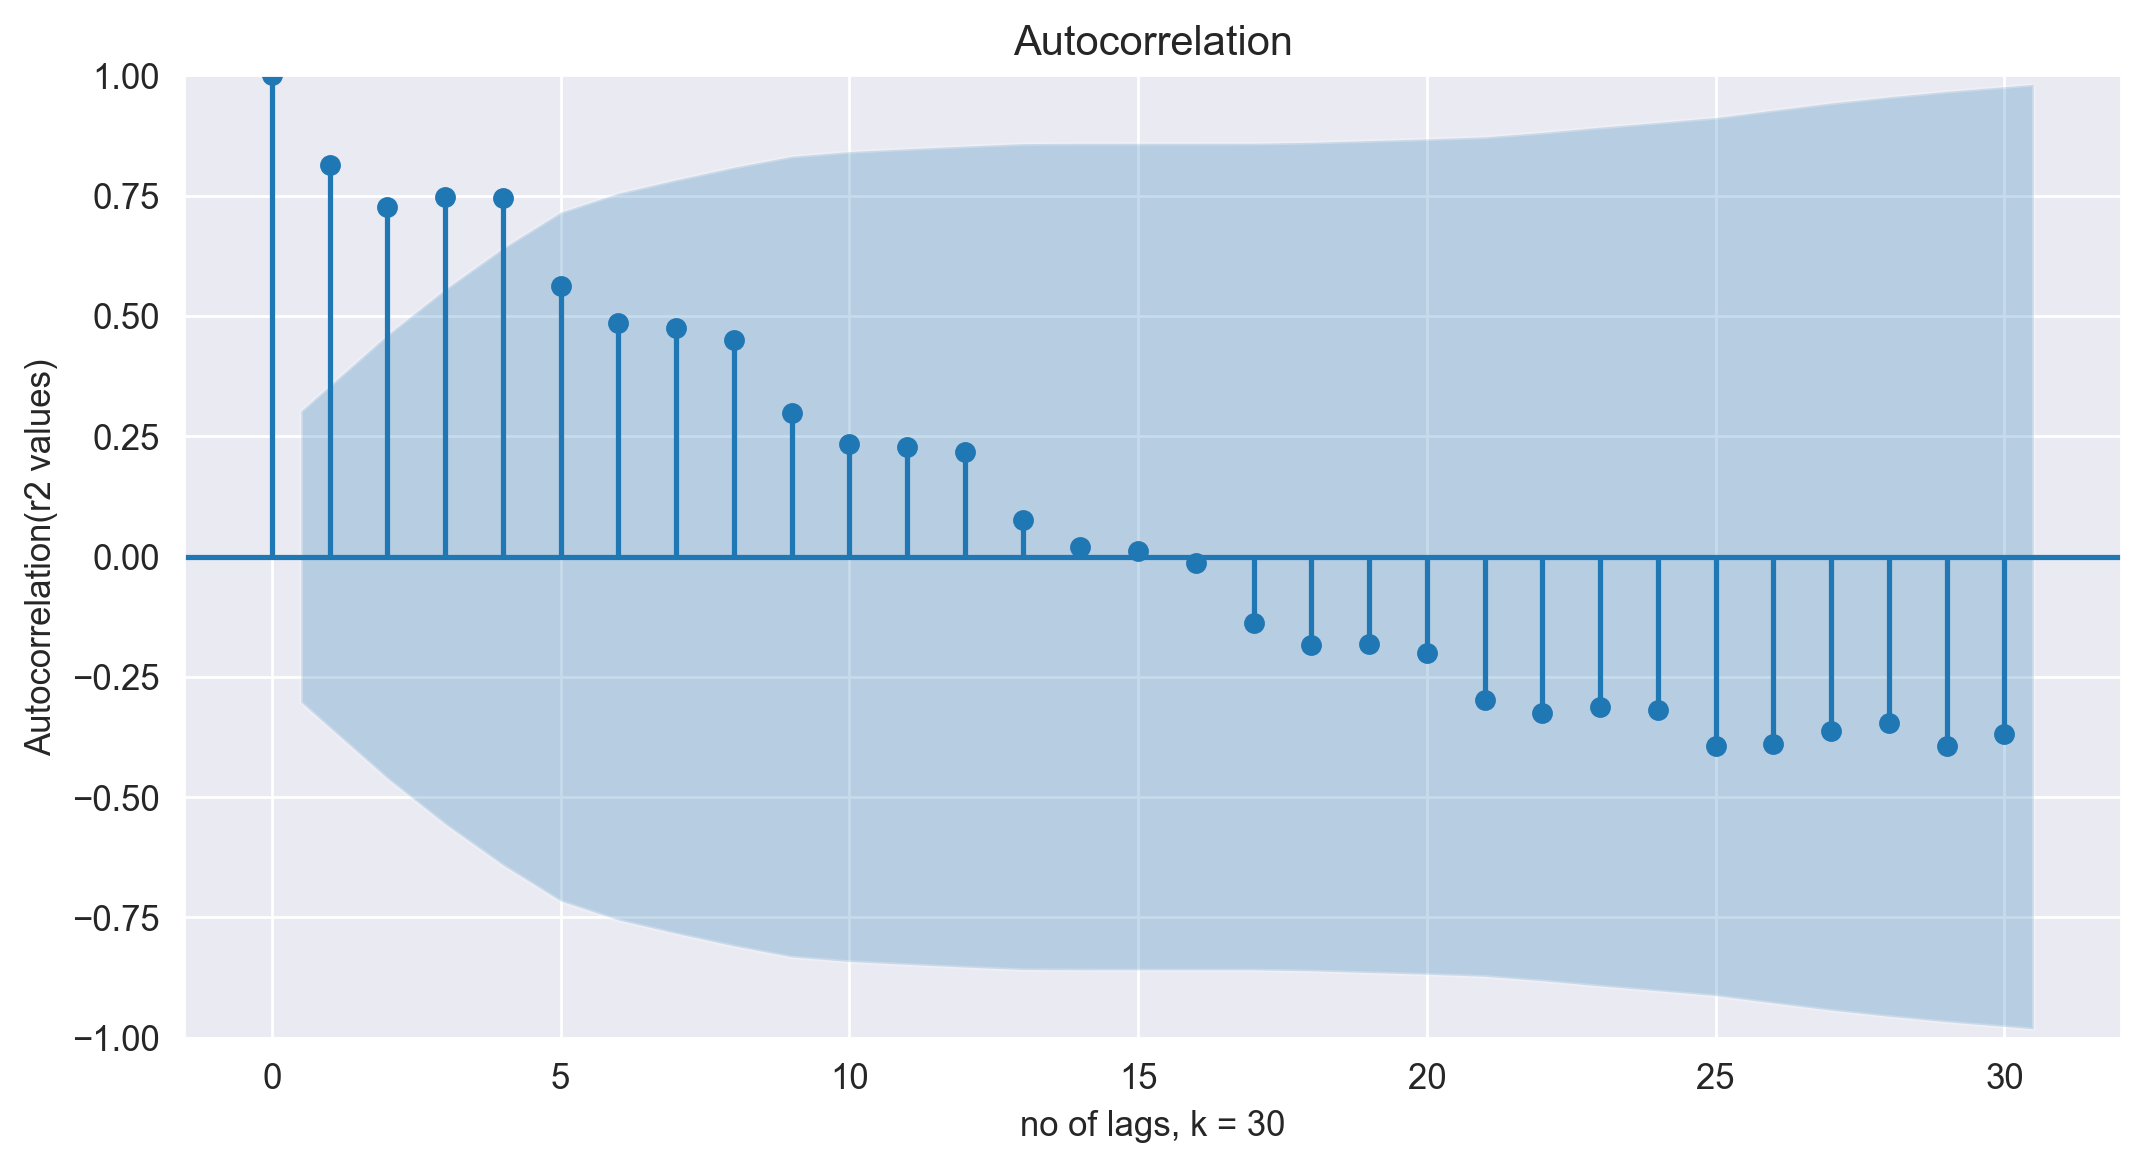

In [14]:
plot_acf(df['Sales'], lags = 30)
plt.xlabel('no of lags, k = 30')
plt.ylabel('Autocorrelation(r2 values)')

<Axes: xlabel='Quarter', ylabel='Sales'>

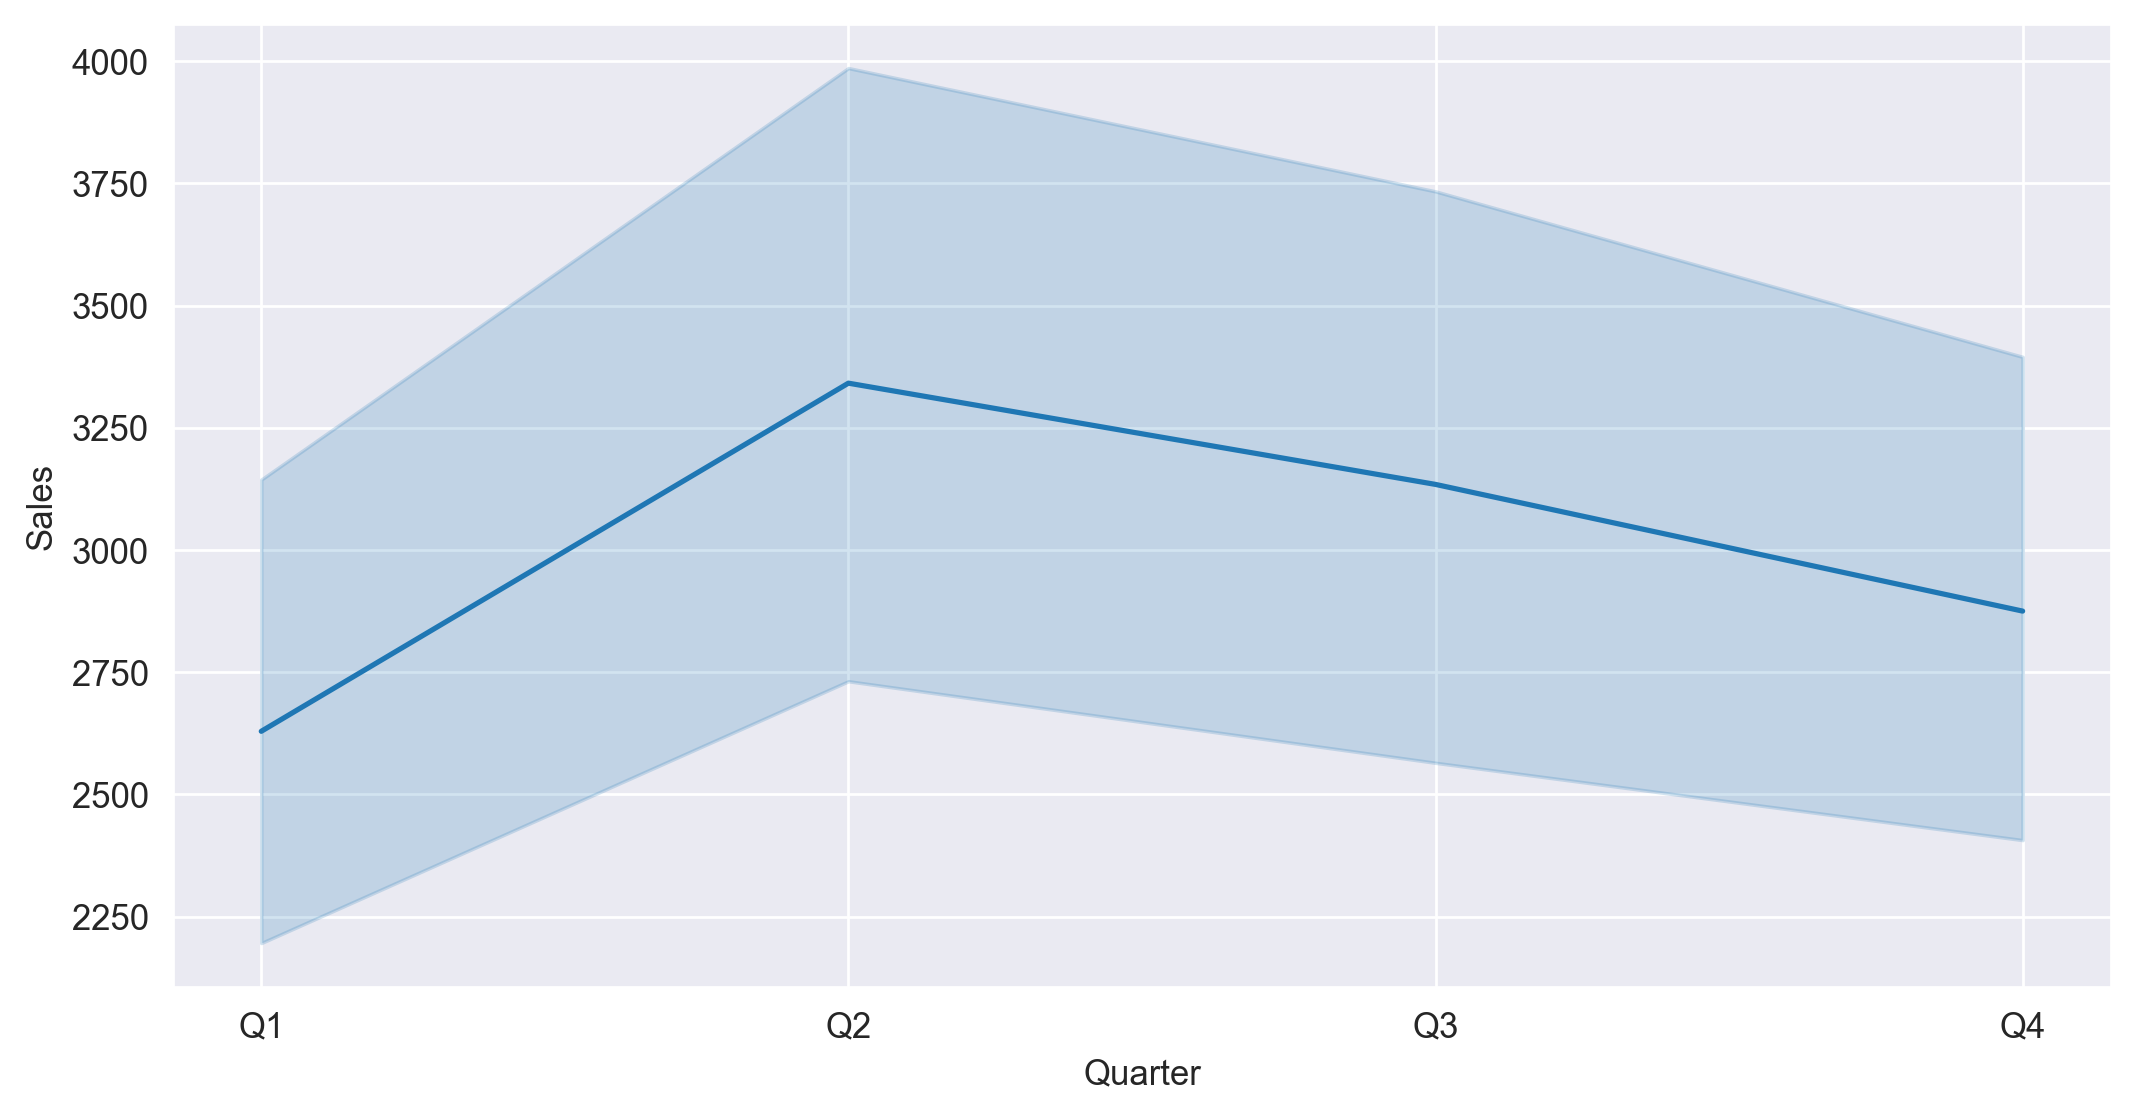

In [15]:
sns.lineplot(x = 'Quarter', y = 'Sales',data=df)

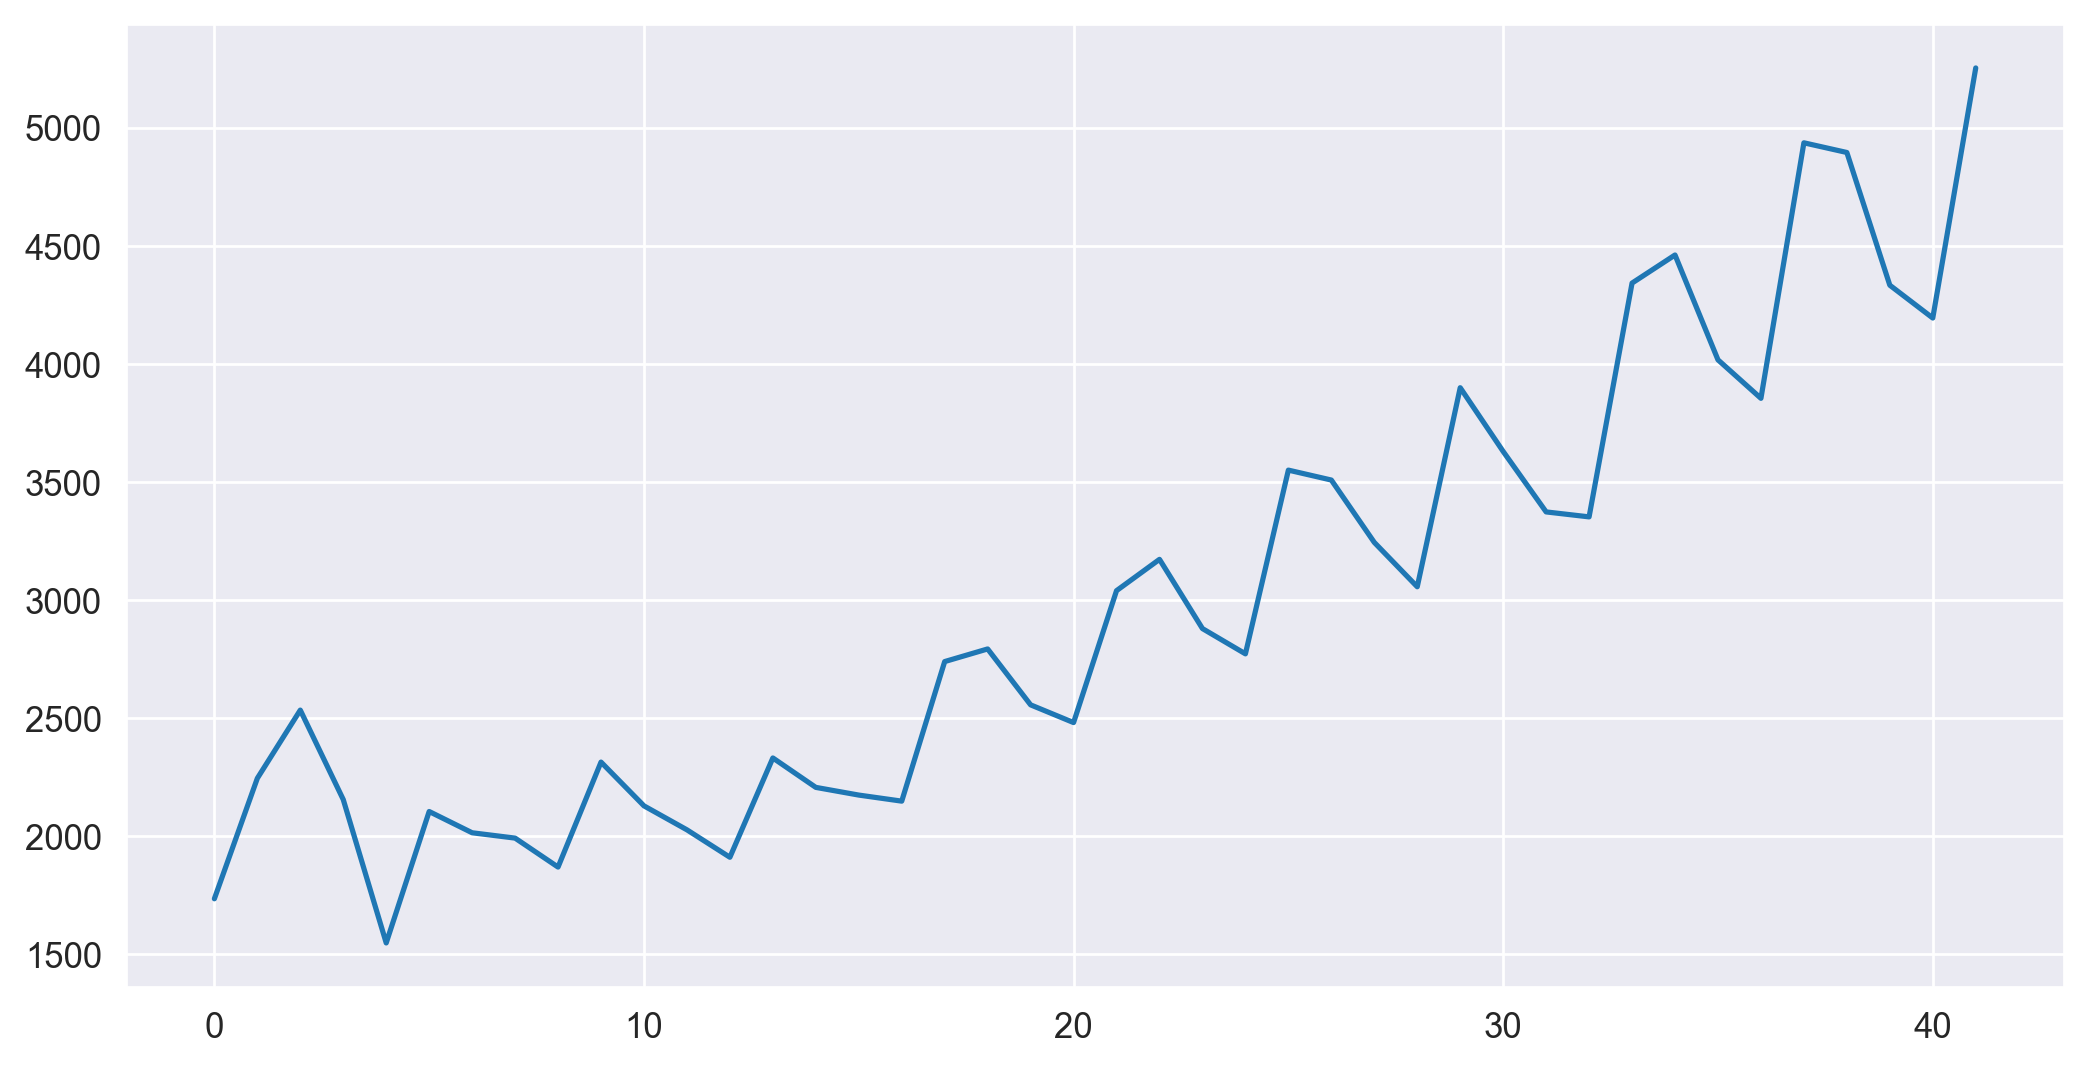

In [16]:
plt.plot(df['Sales'])

In [17]:
train = df.head(40)
test = df.tail(7)

In [18]:
train

,Quarter,Sales,Quater,Q1,Q2,Q3,Q4,Q1,Q2,Q3,Q4,t,t_squared,log_sales
0,Q1,1734.827000,0,1,0,0,0,1,0,0,0,1,1,7.458663
1,Q2,2244.960999,0,0,1,0,0,0,1,0,0,2,4,7.716443
2,Q3,2533.804993,0,0,0,1,0,0,0,1,0,3,9,7.837477
3,Q4,2154.962997,0,0,0,0,1,0,0,0,1,4,16,7.675529
4,Q1,1547.818996,0,1,0,0,0,1,0,0,0,5,25,7.344602
5,Q2,2104.411995,0,0,1,0,0,0,1,0,0,6,36,7.651791
6,Q3,2014.362999,0,0,0,1,0,0,0,1,0,7,49,7.608058
7,Q4,1991.746998,0,0,0,0,1,0,0,0,1,8,64,7.596767
8,Q1,1869.049999,0,1,0,0,0,1,0,0,0,9,81,7.533186
9,Q2,2313.631996,0,0,1,0,0,0,1,0,0,10,100,7.746574


In [19]:
test

,Quarter,Sales,Quater,Q1,Q2,Q3,Q4,Q1,Q2,Q3,Q4,t,t_squared,log_sales
35,Q4,4017.0,0,0,0,0,1,0,0,0,1,36,1296,8.298291
36,Q1,3854.0,0,1,0,0,0,1,0,0,0,37,1369,8.256867
37,Q2,4936.0,0,0,1,0,0,0,1,0,0,38,1444,8.504311
38,Q3,4895.0,0,0,0,1,0,0,0,1,0,39,1521,8.495970
39,Q4,4333.0,0,0,0,0,1,0,0,0,1,40,1600,8.374015
40,Q1,4194.0,0,1,0,0,0,1,0,0,0,41,1681,8.341410
41,Q2,5253.0,0,0,1,0,0,0,1,0,0,42,1764,8.566555


# Linear Model

In [23]:
from sklearn.metrics import mean_squared_error

In [21]:
lm = smf.ols('Sales~t',data=train).fit()
pred_lm = pd.Series(lm.predict(test['t']))
rmse_lm =  np.sqrt(mean_squared_error(test['Sales'],pred_lm))
rmse_lm

509.0776920949597

# Exponential Model

In [22]:
em = smf.ols('log_sales~t',data=train).fit()
pred_em = pd.Series(em.predict(test['t']))
rmse_em = np.sqrt(mean_squared_error(test['Sales'],pred_em))
rmse_em

4515.785080065338

# Quadratic Model

In [24]:
qm = smf.ols('Sales~t+t_squared',data=train).fit()
pred_qm = pd.Series(qm.predict(test[["t", "t_squared"]]))
rmse_qm = np.sqrt(mean_squared_error(test['Sales'],pred_qm))
rmse_qm

429.76361481861056

# Additive Seasonality

In [25]:
a_s = smf.ols('Sales~Q1+Q2+Q3',data=train).fit()
pred_as = pd.Series(a_s.predict(test[['Q1','Q2','Q3','Q4']]))
rmse_as = np.sqrt(mean_squared_error(test['Sales'],pred_as))
rmse_as

1648.1686312276404

# Additive Seasonality Quadratic

In [26]:
asq = smf.ols('Sales~t+t_squared+Q1+Q2+Q3+Q4',data=train).fit()
pred_asq = asq.predict(test[['t','t_squared','Q1','Q2','Q3','Q4']])
rmse_asq = np.sqrt(mean_squared_error(test['Sales'],pred_asq))
rmse_asq

205.3740250340481

# Multiplicative Seasonality

In [27]:
ms = smf.ols('log_sales~Q1+Q2+Q3+Q4',data=train).fit()
pred_ms = ms.predict(test)
rmse_ms = np.sqrt(mean_squared_error(test['Sales'],pred_ms))
rmse_ms

4516.2340151757335

# Multiplicative Additive Seasonality

In [28]:
mas = smf.ols('log_sales~Q1+Q2+Q3+Q4',data=train).fit()
pred_mas = mas.predict(test)
rmse_mas = np.sqrt(mean_squared_error(test['Sales'],pred_mas))
rmse_mas

4516.2340151757335

# Multiplicative Seasonality Quadratic

In [29]:
msq = smf.ols('log_sales~Q1+Q2+Q3+Q4',data=train).fit()
pred_msq = msq.predict(test[['Q1','Q2','Q3','Q4']])
rmse_msq = np.sqrt(mean_squared_error(test['Sales'],pred_msq))
rmse_msq

4516.2340151757335

In [30]:
data = {"Model":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"])
        ,"Rmse_Value":pd.Series([rmse_lm,rmse_em,rmse_qm,rmse_as,rmse_asq,rmse_ms,rmse_mas,rmse_msq])}
table_rmse = pd.DataFrame(data)
table_rmse.sort_values(['Rmse_Value'])

,Model,Rmse_Value
4,rmse_add_sea_quad,205.374025
2,rmse_Quad,429.763615
0,rmse_linear,509.077692
3,rmse_add_sea,1648.168631
1,rmse_Exp,4515.785080
5,rmse_Mult_sea,4516.234015
6,rmse_Mult_add_sea,4516.234015
7,NaN,4516.234015


In [31]:
final_model = smf.ols('Sales~t+t_squared+Q1+Q2+Q3+Q4',data=train).fit()

In [32]:
pred_new = pd.Series(final_model.predict(df))
pred_new

0     1668.865672
1     2277.810819
2     2193.401768
3     1865.749016
4     1685.093563
5     2309.260877
6     2240.073993
7     1927.643408
8     1762.210122
9     2401.599603
10    2347.634886
11    2050.426468
12    1900.215349
13    2554.826997
14    2516.084447
15    2234.098196
16    2099.109245
17    2768.943060
18    2745.422677
19    2478.658593
20    2358.891808
21    3043.947790
22    3035.649574
23    2784.107657
24    2679.563040
25    3379.841189
26    3386.765140
27    3150.445390
28    3061.122940
29    3776.623256
30    3798.769374
31    3577.671791
32    3503.571508
33    4234.293991
34    4271.662276
35    4065.786860
36    4006.908744
37    4752.853394
38    4805.443846
39    4614.790597
40    4571.134648
41    5332.301465
dtype: float64

In [33]:
df['Forecasted_Sales'] = pd.Series(np.exp(pred_new))

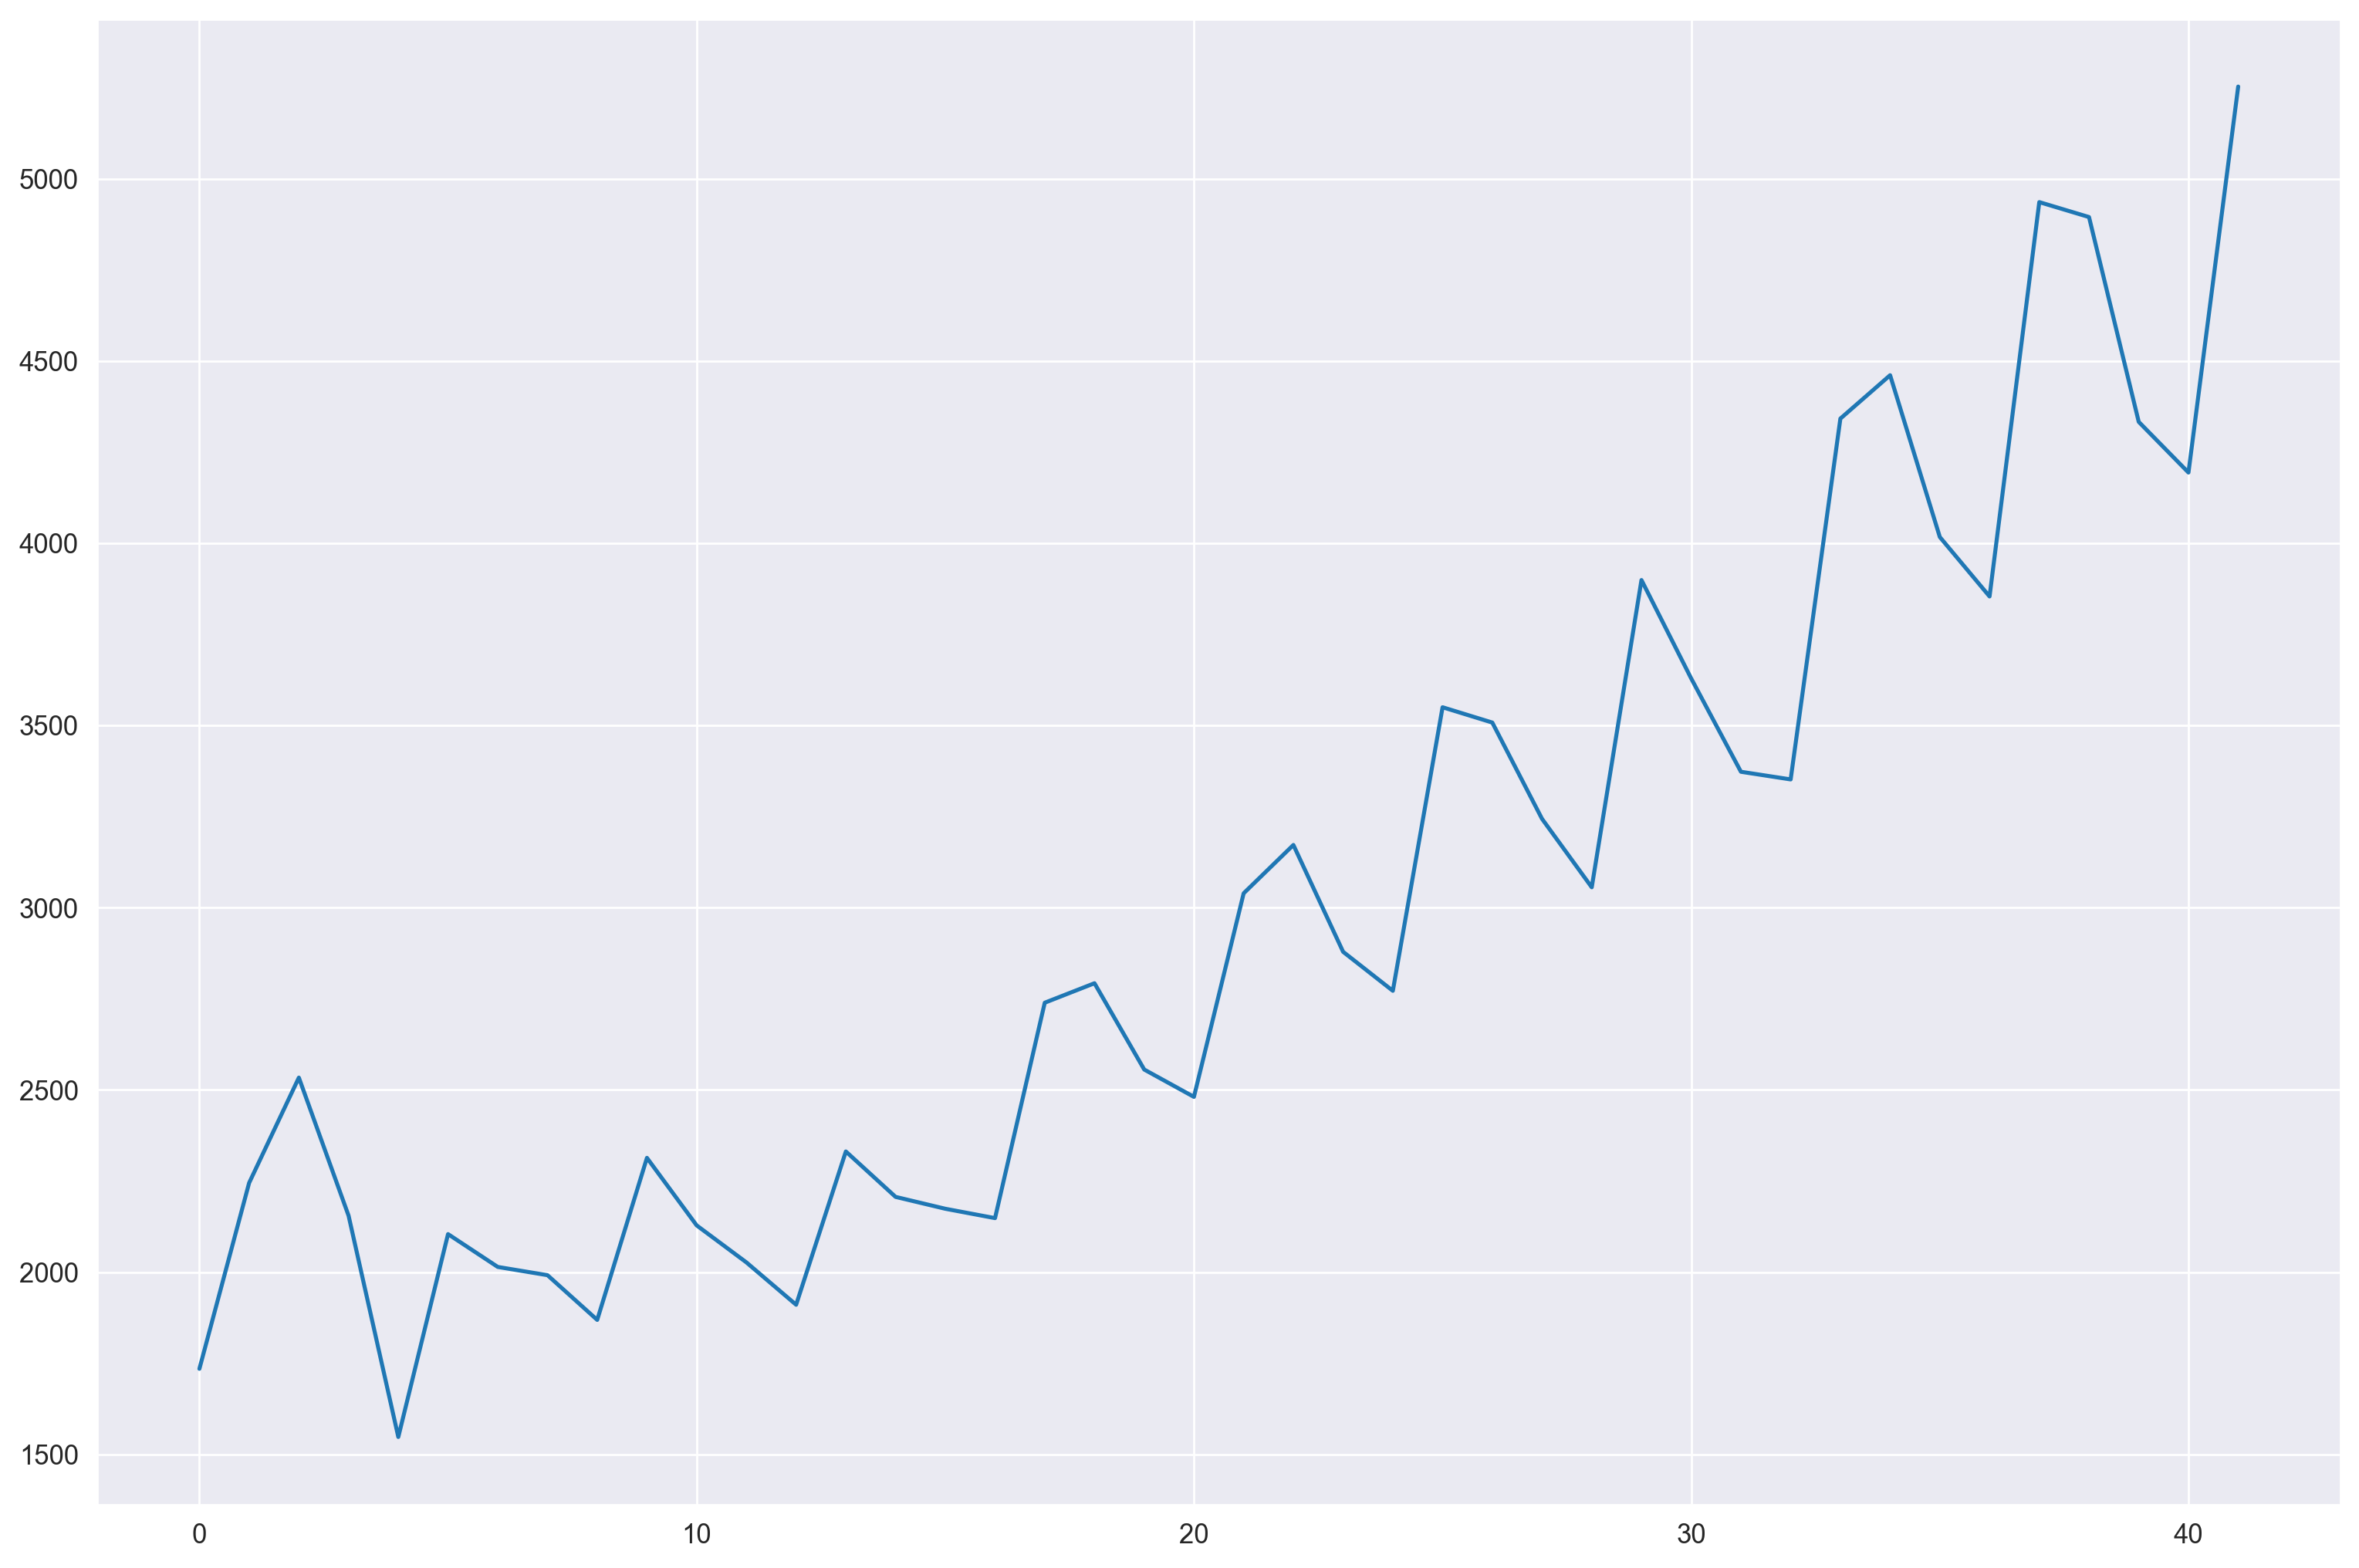

In [34]:
plt.figure(figsize=(15,10))
plt.plot(df[['Sales','Forecasted_Sales']].reset_index(drop=True))